# Notebook for data processing and simple visualization

In [188]:
from scraper import KinoPoisk
import pandas as pd
import numpy as np
from currency_converter import CurrencyConverter
import sqlite3
from datetime import date
import sys
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt

## Raw Data

In [189]:
df = pd.read_csv('KinoPoisk.csv')
df.head(5)

,Аудиодорожки,Субтитры,Качество видео,Год производства,Страна,Жанр,Слоган,Режиссер,Сценарий,Продюсер,Оператор,Композитор,Художник,Монтаж,Бюджет,Маркетинг,Сборы в США,Сборы в мире,Зрители,Премьера в Росcии,Премьера в мире,Релиз на DVD,Возраст,Рейтинг MPAA,Время,Название фильма,Актеры,Оценка фильма,Релиз на Blu-ray,Сборы в России,Ре-релиз (РФ),Цифровой релиз,Директор фильма,4K доступно только на больших экранах,Платформа
0,"Русский, Английский",Русские,NaN,1999,США,"драма, фэнтези, криминал",«Пол Эджкомб не верил в чудеса. Пока не столкн...,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг","Фрэнк Дарабонт, Дэвид Валдес",Дэвид Тэттерсолл,Томас Ньюман,"Теренс Марш, Уильям Крус, Керин Вагнер, ...",Ричард Фрэнсис-Брюс,$60 000 000,$30 000 000,$136 801 374,+ $150 000 000 = $286 801 374,26 млн,"18 апреля 2000, «West»","6 декабря 1999, ...","13 февраля 2001, «West Video»",16+,R,189 мин. / 03:09,Зеленая миля (1999)The Green Mile16+,Том ХэнксДэвид МорсБонни ХантМайкл Кларк Дунка...,9.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Русский, Английский",Русские,NaN,1993,США,"драма, биография, история, военный",«Этот список - жизнь»,Стивен Спилберг,"Стивен Зеллиан, Томас Кенилли","Ирвинг Гловин, Кэтлин Кеннеди, Бранко Лустиг, ...",Януш Камински,Джон Уильямс,"Аллан Старски, Анна Б. Шеппард",Майкл Кан,$22 000 000,NaN,$96 065 768,+ $225 240 537 = $321 306 305,23 млн,"21 мая 1994, «Ист-Вест»","30 ноября 1993, ...","28 сентября 2004, «Premier Digital»",16+,R,195 мин. / 03:15,Список Шиндлера (1993)Schindler's List16+,Лиам НисонБен КингслиРэйф ФайнсКэролайн Гудолл...,8.80,"11 апреля 2013, «Двадцатый Век Фокс СНГ»",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1994,США,драма,«Страх - это кандалы. Надежда - это свобода»,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг","Лиз Глоцер, Дэвид В. Лестер, Ники Марвин",Роджер Дикинс,Томас Ньюман,"Теренс Марш, Питер Лэндсдаун Смит, Элизабет Ма...",Ричард Фрэнсис-Брюс,$25 000 000,NaN,$28 341 469,+ $77 218 = $28 418 687,6.7 млн,"24 октября 2019, «Иноекино»","10 сентября 1994, ...","1 сентября 1999, «Videogram»",16+,R,142 мин. / 02:22,Побег из Шоушенка (1994)The Shawshank Redempti...,Тим РоббинсМорган ФриманБоб ГантонУильям Сэдле...,9.10,"27 августа 2009, «Союз-Видео»",$87 432,NaN,NaN,NaN,NaN,NaN
3,"Русский, Русский 5.1, Английский, Английский 5.1",Русские,NaN,1994,США,"драма, комедия, мелодрама, история, военный","«Мир уже никогда не будет прежним, после того ...",Роберт Земекис,"Эрик Рот, Уинстон Грум","Венди Файнерман, Стив Старки, Стив Тиш, ...",Дон Бёрджесс,Алан Сильвестри,"Рик Картер, Лесли МакДональд, Уильям Джеймс Ти...",Артур Шмидт,$55 000 000,NaN,$329 694 499,+ $347 693 217 = $677 387 716,78.5 млн,"13 февраля 2020, «Иноекино»","23 июня 1994, ...","1 декабря 2009, «Юниверсал Пикчерс Рус»",16+,PG-13,142 мин. / 02:22,Форрест Гамп (1994)Forrest Gump16+,Том ХэнксРобин РайтСалли ФилдГэри СинизМайкелт...,8.90,NaN,$84 460,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2003,"Новая Зеландия, США","фэнтези, приключения, драма",«There can be no triumph without loss. No vict...,Питер Джексон,"Фрэн Уолш, Филиппа Бойенс, Питер Джексон, ...","Питер Джексон, Eric Monette, Барри М. Осборн, ...",Эндрю Лесни,Говард Шор,"Грант Мейджор, Джо Бликли, Саймон Брайт, ...",Джэми Селкирк,$94 000 000,$50 000 000,$378 251 207,+ $768 206 541 = $1 146 457 748,61.9 млн,"22 января 2004, «Каро-Премьер»","1 декабря 2003, ...","25 мая 2004, «Premier Digital»",12+,PG-13,201 мин. / 03:21,Властелин колец: Возвращение короля (2003)The ...,Элайджа ВудВигго МортенсенШон ЭстинИэн Маккелл...,8.70,"6 апреля 2010, «Юниверсал Пикчерс Рус»",$14 085 000,"29 апреля 2021, «UPI»",NaN,NaN,NaN,NaN


## Part 1: Data proccessing

### Deleting too small columns

In [233]:
df_cleared = df.dropna(axis=1, thresh=190)
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Аудиодорожки      209 non-null    object 
 1   Субтитры          209 non-null    object 
 2   Год производства  250 non-null    int64  
 3   Страна            250 non-null    object 
 4   Жанр              250 non-null    object 
 5   Слоган            250 non-null    object 
 6   Режиссер          250 non-null    object 
 7   Сценарий          250 non-null    object 
 8   Продюсер          205 non-null    object 
 9   Оператор          215 non-null    object 
 10  Композитор        250 non-null    object 
 11  Художник          248 non-null    object 
 12  Монтаж            247 non-null    object 
 13  Бюджет            198 non-null    object 
 14  Сборы в США       190 non-null    object 
 15  Сборы в мире      197 non-null    object 
 16  Зрители           215 non-null    object 
 1

### Transforming data

In [234]:
df_cleared['Бюджет'] = df_cleared['Бюджет'].str.replace(' ', '')
df_cleared['Бюджет'] = df_cleared['Бюджет'].str.replace('$', '')
c = CurrencyConverter()

def budget_transformation_to_usd(x):
    try:
        result = 0
        year = df_cleared.loc[df_cleared['Бюджет'] == x, 'Год производства'].values[0]
        if type(x) == str:
            if '€' in x:
                x = float(x.replace('€', ''))
                x = (c.convert(x, 'EUR', 'USD', date=date(year, 1, 1)))
            elif 'DEM' in x:
                x = float(x.replace('DEM', ''))
                x = (c.convert(x, 'DEM', 'USD', date=date(year, 1, 1)))
            elif 'р.' in x:
                x = float(x.replace('р.', ''))
                x = (c.convert(x, 'RUB', 'USD', date=date(year, 1, 1)))
            elif '₽' in x:
                x = float(x.replace('₽', ''))
                x = (c.convert(x, 'RUB', 'USD', date=date(year, 1, 1)))
            elif '£' in x:
                x = float(x.replace('£', ''))
                x = (c.convert(x, 'GBP', 'USD', date=date(year, 1, 1)))
            elif 'FRF' in x:
                x = float(x.replace('FRF', ''))
                x = (c.convert(x, 'FRF', 'USD', date=date(year, 1, 1)))
            elif '¥' in x:
                x = float(x.replace('¥', ''))
                x = (c.convert(x, 'JPY', 'USD', date=date(year, 1, 1)))
            elif 'DKK' in x:
                x = float(x.replace('DKK', ''))
                x = (c.convert(x, 'DKK', 'USD', date=date(year, 1, 1)))
        elif type(x) != str:
            x = str(x)
            if '€' in x:
                x = float(x.replace('€', ''))
                x = (c.convert(x, 'EUR', 'USD', date=date(year, 1, 1)))
            elif 'DEM' in x:
                x = float(x.replace('DEM', ''))
                x = (c.convert(x, 'DEM', 'USD', date=date(year, 1, 1)))
            elif 'р.' in x:
                x = float(x.replace('р.', ''))
                x = (c.convert(x, 'RUB', 'USD', date=date(year, 1, 1)))
            elif '₽' in x:
                x = float(x.replace('₽', ''))
                x = (c.convert(x, 'RUB', 'USD', date=date(year, 1, 1)))
            elif '£' in x:
                x = float(x.replace('£', ''))
                x = (c.convert(x, 'GBP', 'USD', date=date(year, 1, 1)))
            elif 'FRF' in x:
                x = float(x.replace('FRF', ''))
                x = (c.convert(x, 'FRF', 'USD', date=date(year, 1, 1)))
            elif '¥' in x:
                x = float(x.replace('¥', ''))
                x = (c.convert(x, 'JPY', 'USD', date=date(year, 1, 1)))
            elif 'DKK' in x:
                x = float(x.replace('DKK', ''))
                x = (c.convert(x, 'DKK', 'USD', date=date(year, 1, 1)))
        return x
    except:
        return x
            
df_cleared['Бюджет'] = df_cleared['Бюджет'].apply(lambda y: budget_transformation_to_usd(x=y))
df_cleared['Бюджет'] = df_cleared['Бюджет'].str.replace('nan', '0')
df_cleared['Бюджет'] = df_cleared['Бюджет'].apply(pd.to_numeric)

clear_output()

In [235]:
df_cleared['Сборы в США'] = df_cleared['Сборы в США'].str.replace(' ', '')
df_cleared['Сборы в США'] = df_cleared['Сборы в США'].str.replace('$', '')

df_cleared['Сборы в США'] = df_cleared['Сборы в США'].str.replace('nan', '0')
df_cleared['Сборы в США'] = df_cleared['Сборы в США'].apply(pd.to_numeric)

clear_output()

In [236]:
df_cleared['Сборы в мире'] = df_cleared['Сборы в мире'].str.replace(' ', '')
df_cleared['Сборы в мире'] = df_cleared['Сборы в мире'].str.replace('$', '')
df_cleared['Сборы в мире'] = df_cleared['Сборы в мире'].str.replace('+', '')
df_cleared['Сборы в мире'] = df_cleared['Сборы в мире'].apply(lambda x: max(x.split('=')) if type(x) == str else x)
df_cleared['Сборы в мире'] = df_cleared['Сборы в мире'].str.replace('nan', '0')
df_cleared['Сборы в мире'] = df_cleared['Сборы в мире'].apply(pd.to_numeric)
clear_output()


In [237]:
def views(x):
    list_of_symbols = [' ', 'млн.', 'тыс.', 'млн', 'тыс', 'nan']
    list_of_replacements = ['', '000000', '000', '000000', '000', '0']
    if type(x) != str:
        x = str(x)
    for symbol in list_of_symbols:
        if symbol in x:
            x = x.replace(symbol, list_of_replacements[list_of_symbols.index(symbol)])
    if '.' in x:
        x = x.replace('.', '')
        x = float(x) * (0.1)
        return int(x)
    else:
        return int(x)
df_cleared['Зрители'] = df_cleared['Зрители'].apply(views)
clear_output()

In [238]:
pd.options.display.float_format = "{:.2f}".format
df_cleared.describe()

,Год производства,Бюджет,Сборы в США,Сборы в мире,Зрители,Оценка фильма
count,250.00,181.00,190.00,197.00,250.00,250.00
mean,1997.19,74781511.76,156904976.49,362520773.62,24716632.80,8.22
std,16.42,72229742.82,151522536.53,428477578.07,27006766.81,0.25
min,1939.00,340000.00,5710.00,1887.00,0.00,7.70
25%,1987.25,20000000.00,45350035.25,57759104.00,1500000.00,8.00
50%,2001.00,50000000.00,119495360.50,264118201.00,16150000.00,8.20
75%,2010.00,102000000.00,231176147.50,516950043.00,41500000.00,8.40
max,2021.00,356000000.00,858373000.00,2923905528.00,178100000.00,9.10


In [239]:
def categorical_data_processing(column):
    all_categories = []
    for record in df_cleared[column]:
        new_record = record.split(',')
        for word in new_record:
            word = word.strip()
        all_categories.append(word)
    all_categories = list(set(all_categories))
    for category in all_categories:
        df_cleared[column + ': ' + category] = df_cleared[column].apply(lambda x: True if category in x else False)

categorical_data_processing(column='Жанр')
categorical_data_processing(column='Страна')
clear_output()



,Аудиодорожки,Субтитры,Год производства,Страна,Жанр,Слоган,Режиссер,Сценарий,Продюсер,Оператор,Композитор,Художник,Монтаж,Бюджет,Сборы в США,Сборы в мире,Зрители,Премьера в мире,Релиз на DVD,Возраст,Рейтинг MPAA,Время,Название фильма,Актеры,Оценка фильма,Жанр: спорт,Жанр: детектив,Жанр: драма,Жанр: криминал,Жанр: триллер,Жанр: вестерн,Жанр: ужасы,Жанр: приключения,Жанр: музыка,Жанр: военный,Жанр: боевик,Жанр: комедия,Жанр: мюзикл,Жанр: мелодрама,Жанр: фэнтези,Жанр: история,Жанр: семейный,Жанр: биография,Страна: Великобритания,Страна: Люксембург,Страна: Индия,Страна: Мексика,Страна: Марокко,Страна: Италия,Страна: Франция,Страна: Китай,Страна: Швеция,Страна: Япония,Страна: Австралия,Страна: США,Страна: Германия,Страна: СССР,Страна: Таиланд,Страна: Канада,Страна: Гонконг,Страна: Беларусь,Страна: Германия (ФРГ),Страна: Россия,Страна: Корея Южная
0,"Русский, Английский",Русские,1999,США,"драма, фэнтези, криминал",«Пол Эджкомб не верил в чудеса. Пока не столкн...,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг","Фрэнк Дарабонт, Дэвид Валдес",Дэвид Тэттерсолл,Томас Ньюман,"Теренс Марш, Уильям Крус, Керин Вагнер, ...",Ричард Фрэнсис-Брюс,60000000.00,136801374.00,286801374.00,26000000,"6 декабря 1999, ...","13 февраля 2001, «West Video»",16+,R,189 мин. / 03:09,Зеленая миля (1999)The Green Mile16+,Том ХэнксДэвид МорсБонни ХантМайкл Кларк Дунка...,9.10,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,"Русский, Английский",Русские,1993,США,"драма, биография, история, военный",«Этот список - жизнь»,Стивен Спилберг,"Стивен Зеллиан, Томас Кенилли","Ирвинг Гловин, Кэтлин Кеннеди, Бранко Лустиг, ...",Януш Камински,Джон Уильямс,"Аллан Старски, Анна Б. Шеппард",Майкл Кан,22000000.00,96065768.00,321306305.00,23000000,"30 ноября 1993, ...","28 сентября 2004, «Premier Digital»",16+,R,195 мин. / 03:15,Список Шиндлера (1993)Schindler's List16+,Лиам НисонБен КингслиРэйф ФайнсКэролайн Гудолл...,8.80,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,NaN,NaN,1994,США,драма,«Страх - это кандалы. Надежда - это свобода»,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг","Лиз Глоцер, Дэвид В. Лестер, Ники Марвин",Роджер Дикинс,Томас Ньюман,"Теренс Марш, Питер Лэндсдаун Смит, Элизабет Ма...",Ричард Фрэнсис-Брюс,25000000.00,28341469.00,77218.00,6700000,"10 сентября 1994, ...","1 сентября 1999, «Videogram»",16+,R,142 мин. / 02:22,Побег из Шоушенка (1994)The Shawshank Redempti...,Тим РоббинсМорган ФриманБоб ГантонУильям Сэдле...,9.10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,"Русский, Русский 5.1, Английский, Английский 5.1",Русские,1994,США,"драма, комедия, мелодрама, история, военный","«Мир уже никогда не будет прежним, после того ...",Роберт Земекис,"Эрик Рот, Уинстон Грум","Венди Файнерман, Стив Старки, Стив Тиш, ...",Дон Бёрджесс,Алан Сильвестри,"Рик Картер, Лесли МакДональд, Уильям Джеймс Ти...",Артур Шмидт,55000000.00,329694499.00,677387716.00,78500000,"23 июня 1994, ...","1 декабря 2009, «Юниверсал Пикчерс Рус»",16+,PG-13,142 мин. / 02:22,Форрест Гамп (1994)Forrest Gump16+,Том ХэнксРобин РайтСалли ФилдГэри СинизМайкелт...,8.90,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,NaN,NaN,2003,"Новая Зеландия, США","фэнтези, приключения, драма",«There can be no triumph without loss. No vict...,Питер Джексон,"Фрэн Уолш, Филиппа Бойенс, Питер Джексо

In [240]:
'''conn = sqlite3.connect('KinoPoisk.db')
c = conn.cursor()
for row in c.execute('SELECT * FROM films_data'):
    print(row)
conn.commit()
conn.close()'''

"conn = sqlite3.connect('KinoPoisk.db')\nc = conn.cursor()\nfor row in c.execute('SELECT * FROM films_data'):\n    print(row)\nconn.commit()\nconn.close()"

## Part 2: Visualization

### Histograms

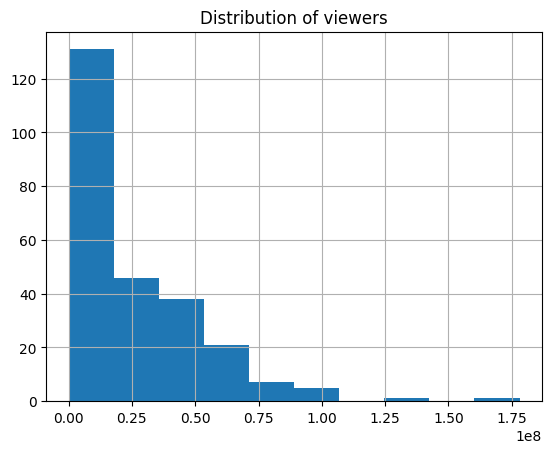

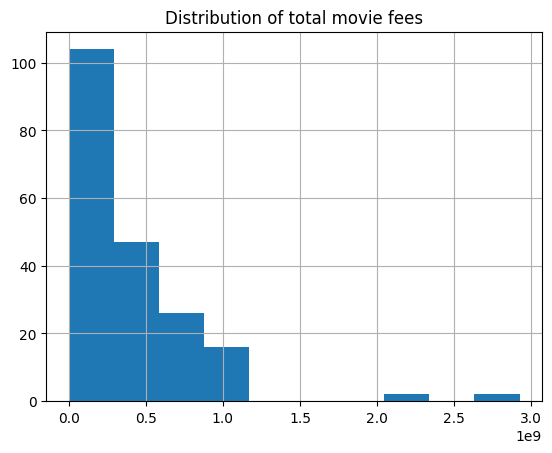

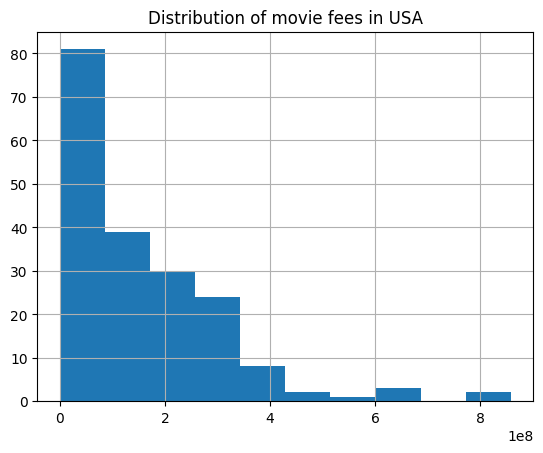

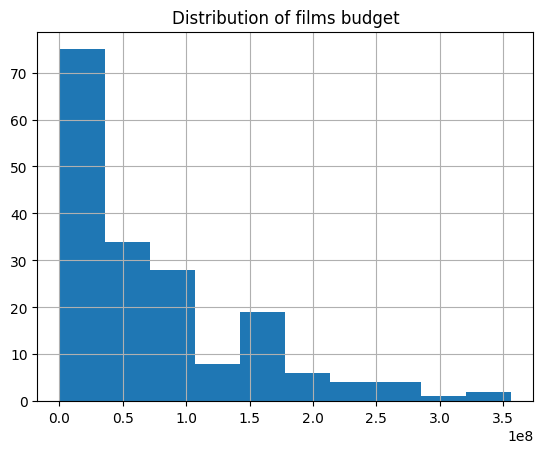

In [241]:
df_cleared['Зрители'].hist()
plt.title('Distribution of viewers')
plt.show()
df_cleared['Сборы в мире'].hist()
plt.title('Distribution of total movie fees')
plt.show()
df_cleared['Сборы в США'].hist()
plt.title('Distribution of movie fees in USA')
plt.show()
df_cleared['Бюджет'].hist()
plt.title('Distribution of films budget')
plt.show()

### Countplots

In [258]:
df_cleared.describe()

,Год производства,Бюджет,Сборы в США,Сборы в мире,Зрители,Оценка фильма
count,250.00,181.00,190.00,197.00,250.00,250.00
mean,1997.19,74781511.76,156904976.49,362520773.62,24716632.80,8.22
std,16.42,72229742.82,151522536.53,428477578.07,27006766.81,0.25
min,1939.00,340000.00,5710.00,1887.00,0.00,7.70
25%,1987.25,20000000.00,45350035.25,57759104.00,1500000.00,8.00
50%,2001.00,50000000.00,119495360.50,264118201.00,16150000.00,8.20
75%,2010.00,102000000.00,231176147.50,516950043.00,41500000.00,8.40
max,2021.00,356000000.00,858373000.00,2923905528.00,178100000.00,9.10


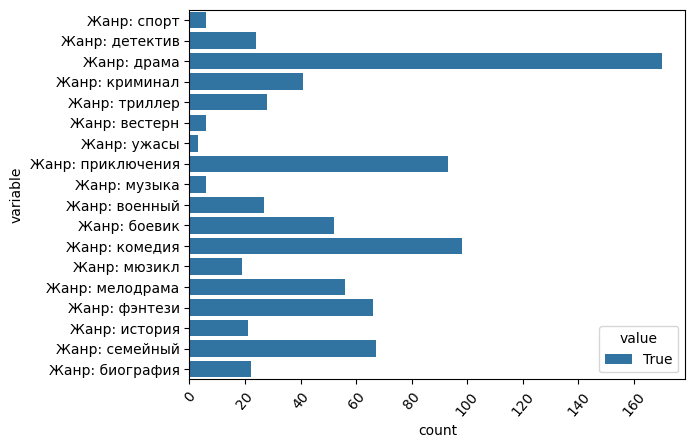

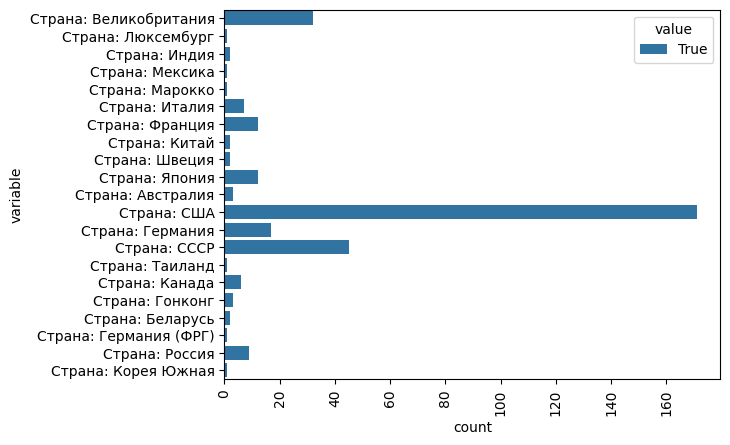

In [303]:
filter_cols_genre = [col for col in df_cleared.columns if col.startswith('Жанр: ')]
data_genre = pd.melt(df_cleared, value_vars=filter_cols_genre)
sns.countplot(y="variable", hue="value", data=data_genre[data_genre.values == True])
plt.tick_params(axis='x', rotation=50)
plt.show()

filter_cols_country = [col for col in df_cleared.columns if col.startswith('Страна: ')]
data_country = pd.melt(df_cleared, value_vars=filter_cols_country)
sns.countplot(y="variable", hue="value", data=data_country[data_country.values == True])
plt.tick_params(axis='x', rotation=90)
plt.show()

#How to order this data in descending order?
# this doesn't work for countries:  order = data_country[data_country.values == True].value_counts().index)

### Time-series plots

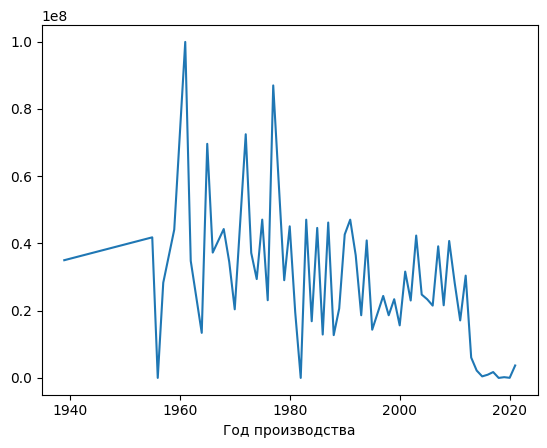

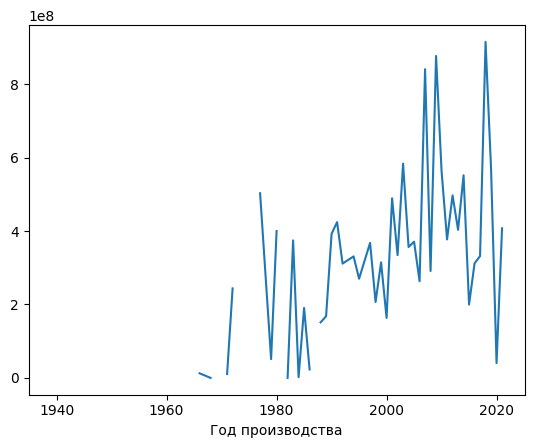

In [317]:
viewers_per_year = df_cleared.groupby('Год производства')['Зрители'].mean()
viewers_per_year.plot()
plt.show()

total_fees_per_year = df_cleared.groupby('Год производства')['Сборы в мире'].mean()
total_fees_per_year.plot()
plt.show()